# Machine Learning Classification example notebook

Uses the kaggle iris dataset

In [1]:
import numpy as np
import pandas as pd

In [36]:
raw_data = pd.read_csv('data\iris.csv')
raw_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.199333
std,0.828066,0.433594,1.764420,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
raw_data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
raw_data.loc[raw_data['class'] == 'Iris-setosa'].describe()

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.418000,1.464000,0.246000
std,0.35249,0.381024,0.173511,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.125000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [6]:
raw_data.loc[raw_data['class'] == 'Iris-versicolor'].describe()

,sepal length,sepal width,petal length,petal width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [7]:
raw_data.loc[raw_data['class'] == 'Iris-virginica'].describe()

,sepal length,sepal width,petal length,petal width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


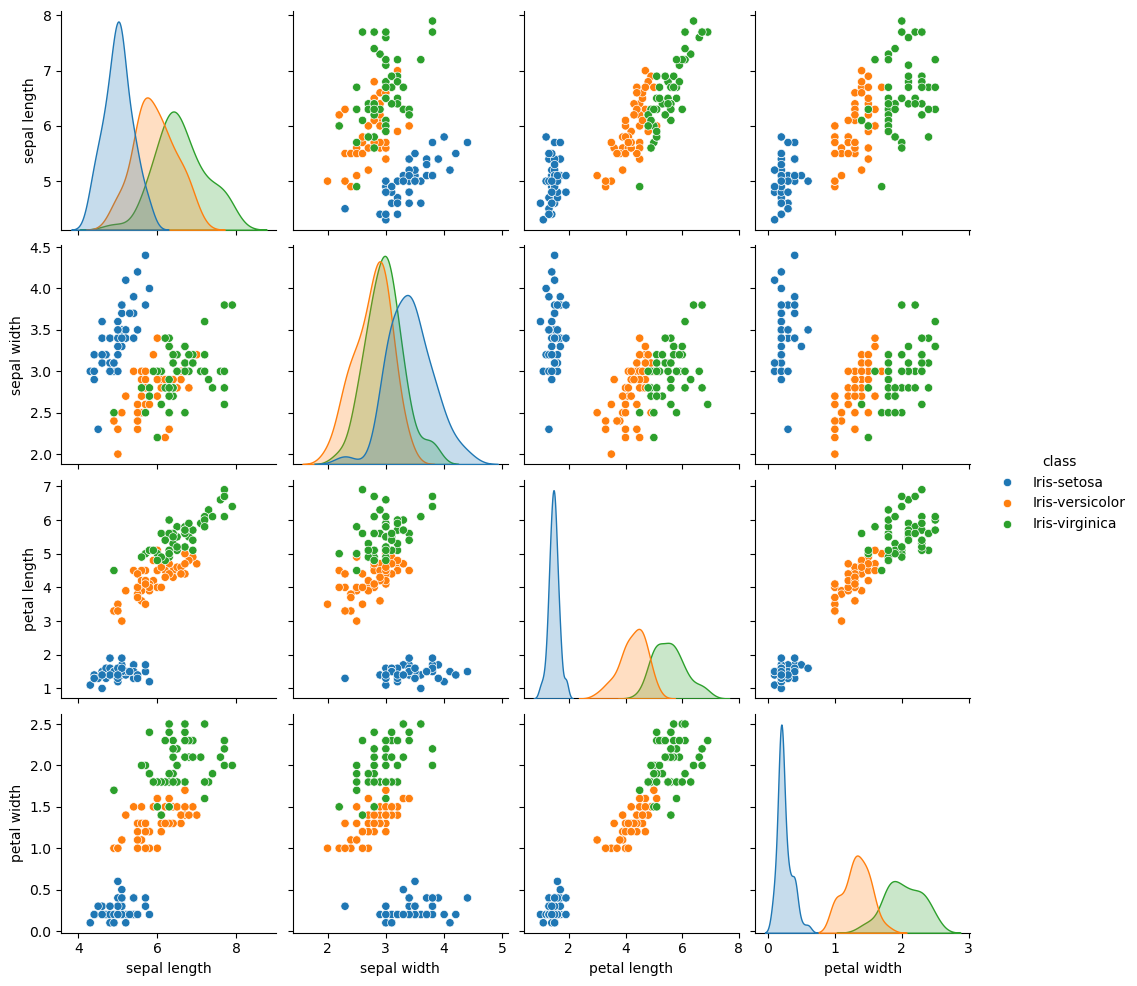

In [8]:
import seaborn as sns
sns.pairplot(raw_data[['sepal length', 'sepal width', 'petal length', 'petal width', 'class']], hue='class')

In [9]:
from scipy.stats import skew
subset = raw_data.loc[raw_data['class'] == 'Iris-virginica']
skew(subset['petal width'])

-0.1255597931582545

In [10]:
raw_data[['petal length', 'petal width']].corr()

,petal length,petal width
petal length,1.000000,0.962796
petal width,0.962796,1.000000


<Axes: xlabel='petal length', ylabel='petal width'>

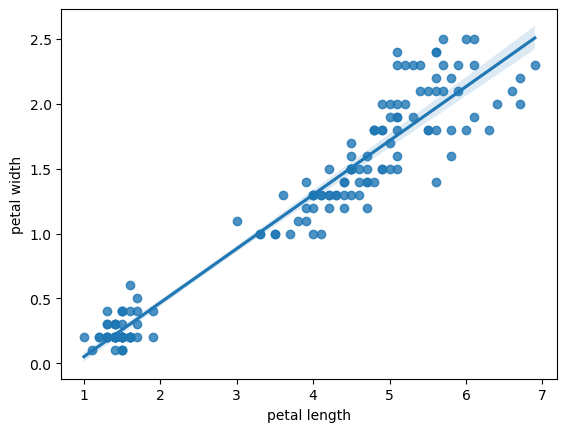

In [11]:
sns.regplot(data=raw_data, x='petal length', y='petal width')

The t-test quantifies the difference between the arithmetic means of the two samples

The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true

A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance

Therefore, we do not reject the null hypothesis of equal population means

If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means

In [12]:
from scipy.stats import ttest_ind
subset1 = raw_data.loc[raw_data['class'] == 'Iris-virginica']
subset2 = raw_data.loc[raw_data['class'] == 'Iris-versicolor']
ttest_ind(subset1['petal length'], subset2['petal length'])

TtestResult(statistic=12.603779441384985, pvalue=3.1788195478061495e-22, df=98.0)

In [13]:
from scipy.stats import ttest_ind
subset1 = raw_data.loc[raw_data['class'] == 'Iris-setosa']
subset2 = raw_data.loc[raw_data['class'] == 'Iris-versicolor']
ttest_ind(subset1['petal length'], subset2['petal length'])

TtestResult(statistic=-39.46866259397272, pvalue=5.717463758170621e-62, df=98.0)

In [14]:
X = raw_data[['petal length', 'petal width']]
y = raw_data['class']

In [15]:
X.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
def score_model(y_test, y_hat):
    from sklearn import metrics
    print('Accuracy : ' + str(metrics.accuracy_score(y_test, y_hat)))
    print('Precision : ' + str(metrics.precision_score(y_test, y_hat, average=None)))
    print('Recall : ' + str(metrics.recall_score(y_test, y_hat, average=None)))
    print('F1 : ' + str(metrics.f1_score(y_test, y_hat, average=None)))
    print('Confusion matrix : \n' + str(metrics.confusion_matrix(y_test, y_hat)))
    

In [31]:
from sklearn import tree
iris_tree = tree.DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
y_hat = iris_tree.predict(X_test)
score_model(y_test, y_hat)

Accuracy : 1.0
Precision : [1. 1. 1.]
Recall : [1. 1. 1.]
F1 : [1. 1. 1.]
Confusion matrix : 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


[Text(0.5, 0.9166666666666666, 'petal width <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]\nclass = Iris versicolor'),
 Text(0.4090909090909091, 0.75, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris setosa'),
 Text(0.4545454545454546, 0.8333333333333333, 'True  '),
 Text(0.5909090909090909, 0.75, 'petal width <= 1.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]\nclass = Iris versicolor'),
 Text(0.5454545454545454, 0.8333333333333333, '  False'),
 Text(0.36363636363636365, 0.5833333333333334, 'petal length <= 4.95\nentropy = 0.535\nsamples = 41\nvalue = [0, 36, 5]\nclass = Iris versicolor'),
 Text(0.18181818181818182, 0.4166666666666667, 'petal width <= 1.6\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris versicolor'),
 Text(0.09090909090909091, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris versicolor'),
 Text(0.2727272727272727, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris virginica'),
 Text(0

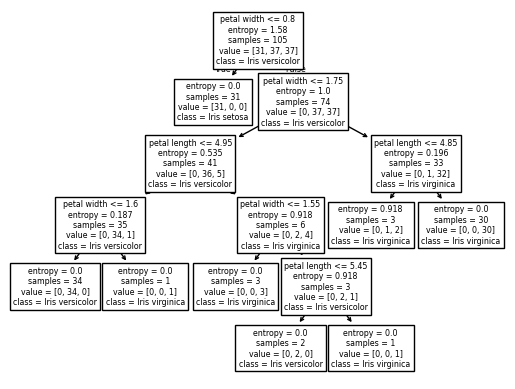

In [23]:
tree.plot_tree(iris_tree, feature_names=['petal length', 'petal width'], class_names=['Iris setosa', 'Iris versicolor', 'Iris virginica'])

In [33]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_hat = svm_model.predict(X_test)
score_model(y_test, y_hat)

Accuracy : 1.0
Precision : [1. 1. 1.]
Recall : [1. 1. 1.]
F1 : [1. 1. 1.]
Confusion matrix : 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
